In [1]:
import sys
import torch
import torchvision
import random

import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

from itertools import permutations, product
from tqdm import tqdm
from sklearn import preprocessing
from torch.utils.data import Dataset, DataLoader
# from models.models import FeatureSelectNet

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
input = torch.rand((32, 1, 25))
em = nn.Conv1d(in_channels=1, out_channels=25, kernel_size=3, padding='same')
em(input).shape

torch.Size([32, 25, 25])

In [38]:
selected = ['WL', 'SSC']
ready_features = ['MAV', 'WMAV', 'RMS']
from copy import deepcopy
selected_f = []
for f in ready_features:
    fs = deepcopy(selected)
    fs.append(f)
    selected_f.append(fs)
selected_f

[['WL', 'SSC', 'MAV'], ['WL', 'SSC', 'WMAV'], ['WL', 'SSC', 'RMS']]

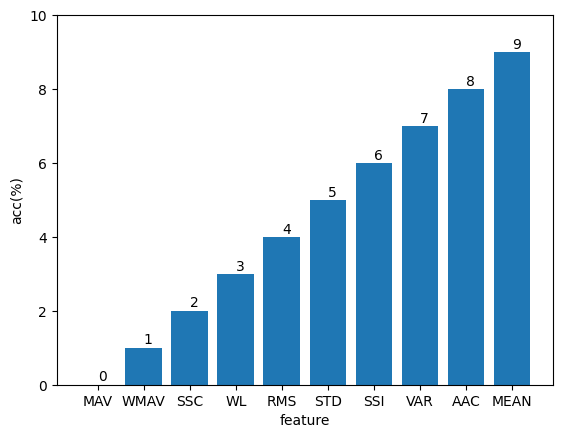

In [28]:
x = ['MAV', 'WMAV', 'SSC', 'WL', 'RMS','STD', 'SSI', 'VAR', 'AAC', 'MEAN']
y = range(10)

plt.bar(x, y)
for i, j in enumerate(y):
    plt.text(i, j+0.1, s=j)
plt.xlabel('feature')
plt.ylabel('acc(%)')
plt.ylim(0, 10)
plt.show()
# plt.savefig('1.jpg')

## 1、DataLoader

In [2]:
feature_images = np.load('./runs/data/user1/feature_images.npy')
feature_image_labels = np.load('./runs/data/user1/feature_image_labels.npy')

In [4]:
feature_images.shape, feature_image_labels.shape, feature_image_labels

((2981, 10, 8), (2981,), array([0., 0., 0., ..., 7., 7., 7.]))

In [12]:
all_features = np.array(['MAV', 'WMAV', 'SSC', 'WL', 'RMS','STD', 'SSI', 'VAR', 'AAC', 'MEAN'])
for i, f in enumerate(all_features):
    data = feature_images[:, i, 5:]
    data = np.reshape(data, (data.shape[0], -1))
    label = feature_image_labels

    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.1, random_state=20)
    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    print(f'{all_features[i]}: {accuracy_score(y_pred, y_test)}')

MAV: 0.919732441471572
WMAV: 0.919732441471572
SSC: 0.13377926421404682
WL: 0.7090301003344481
RMS: 0.903010033444816
STD: 0.862876254180602
SSI: 0.903010033444816
VAR: 0.8662207357859532
AAC: 0.1939799331103679
MEAN: 0.919732441471572


### 1.1 sEMG特征图

In [8]:
all_features = np.array(['MAV', 'WMAV', 'SSC', 'WL', 'RMS','STD', 'SSI', 'VAR', 'AAC', 'MEAN'])
selected_features = np.array(['MAV', 'WMAV', 'SSC', 'WL', 'RMS'])
features_idx = np.where(np.isin(all_features, selected_features))
features_idx

(array([0, 1, 2, 3, 4]),)

In [9]:
# (2981, 1, 3, 5)
semg_features = feature_images[:, features_idx, :5] 
# (2981, 15)
semg_features = np.reshape(semg_features, (semg_features.shape[0], -1))
# 标准化
semg_features = preprocessing.StandardScaler().fit_transform(semg_features)
semg_features.shape

(2981, 25)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(semg_features, feature_image_labels, test_size=0.7, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8, weights='uniform', algorithm='auto', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.4964063248682319

In [ ]:
MAV: 0.39, WMAV: 0.39, SSC: 0.38, 

### 1.2 acc特征图